# C matrices from MGC and DCORR

neurodata/hyppo DCorr with c matrix [branch](https://github.com/neurodata/hyppo/blob/dcorr-c-mat/hyppo/independence/dcorr.py#L228).

neurodata/scipy MGC with c matrix [branch](https://github.com/neurodata/scipy/blob/mgc-c-mat/scipy/stats/_stats.pyx#L487).
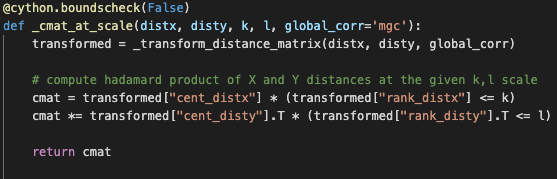

MGC calculations
1. Raw distance matrices $Dx, Dy$
2. $Dx,Dy$ column means subtracted and diagonals at 0 => $A,B$
3. $Dx,Dy$ column values ranked 1-n => $G,H$
4. Given k,l optimal scale: $G_{k} = (G \leq k)$, $H_l = (H \leq l)$ binary matrices
5. C matrix = $A \circ G_k \circ B^T \circ H_l^T$ 

In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

import seaborn as sns

sns.set(color_codes=True, style="white", context="talk", font_scale=1)
PALETTE = sns.color_palette("Set1")

from sklearn.metrics import pairwise_distances
from hyppo.independence import Dcorr
from scipy.stats import multiscale_graphcorr
from hyppo.ksample._utils import k_sample_transform
from graspy.plot import heatmap

import sys

sys.path.append("../")
from src.tools.utils import get_files, get_latents

%load_ext autoreload
%autoreload 2
%load_ext nb_black

/home/rflperry/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.mixture.gaussian_mixture module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.mixture. Anything that cannot be imported from sklearn.mixture is now part of the private API.
  warnings.warn(message, FutureWarning)


<IPython.core.display.Javascript object>

In [2]:
import seaborn as sns

sns.set(color_codes=True, style="white", context="talk", font_scale=2)
PALETTE = sns.color_palette("Set1")
sns.set_palette(PALETTE[3:])

<IPython.core.display.Javascript object>

In [3]:
## Define paths, get raw
base_dir = Path("/mnt/ssd3/ronan/data/gcca_05-26-10:39_min_rank-ZG3/")
groups, labels = get_latents(base_dir, flag="_gcca")

<IPython.core.display.Javascript object>

## Experts vs. Novices

In [4]:
ways = [[0], [0], [0], [1], [1], [1]]
X, Y = k_sample_transform(groups, ways=ways)
X = X[:, :, :3].reshape(X.shape[0], -1)

<IPython.core.display.Javascript object>

In [5]:
X_dists = pairwise_distances(X, metric="euclidean")
Y_dists = pairwise_distances(Y, metric="sqeuclidean") / 2

<IPython.core.display.Javascript object>

DCorr C matrix

In [6]:
dc_stat, dc_pvalue, c_mat = Dcorr(compute_distance=None).test(
    X_dists, Y_dists, workers=-1, reps=1000, c_mat=True
)
print(f"pvalue: {dc_pvalue}")

pvalue: 0.001


<IPython.core.display.Javascript object>

MGC C matrix

In [7]:
stat, pvalue, mgc_dict = multiscale_graphcorr(
    X_dists, Y_dists, workers=-1, reps=1000, compute_distance=None, compute_c_mat=True
)
print(f"pvalue: {pvalue}")
print(f'opt_scale: {mgc_dict["opt_scale"]}')

pvalue: 0.001
opt_scale: [3, 2]


<IPython.core.display.Javascript object>

In [8]:
y = np.repeat(labels, [len(g) for g in groups], axis=0)
label_dict = {"e": "Expert", "n": "Novice"}
y_labels = [f"{label_dict[a]}" for a, b in y]

<IPython.core.display.Javascript object>

In [10]:
help(heatmap)

Help on function heatmap in module graspy.plot.plot:

heatmap(X, transform=None, figsize=(10, 10), title=None, context='talk', font_scale=1, xticklabels=False, yticklabels=False, cmap='RdBu_r', vmin=None, vmax=None, center=0, cbar=True, inner_hier_labels=None, outer_hier_labels=None, hier_label_fontsize=30, ax=None, title_pad=None, sort_nodes=False, **kwargs)
    Plots a graph as a color-encoded matrix.
    
    Nodes can be grouped by providing `inner_hier_labels` or both
    `inner_hier_labels` and `outer_hier_labels`. Nodes can also
    be sorted by the degree from largest to smallest degree nodes.
    The nodes will be sorted within each group if labels are also
    provided.
    
    Read more in the :ref:`tutorials <plot_tutorials>`
    
    Parameters
    ----------
    X : nx.Graph or np.ndarray object
        Graph or numpy matrix to plot
    
    transform : None, or string {'log', 'log10', 'zero-boost', 'simple-all', 'simple-nonzero'}
    
        - 'log'
            Plots t

<IPython.core.display.Javascript object>

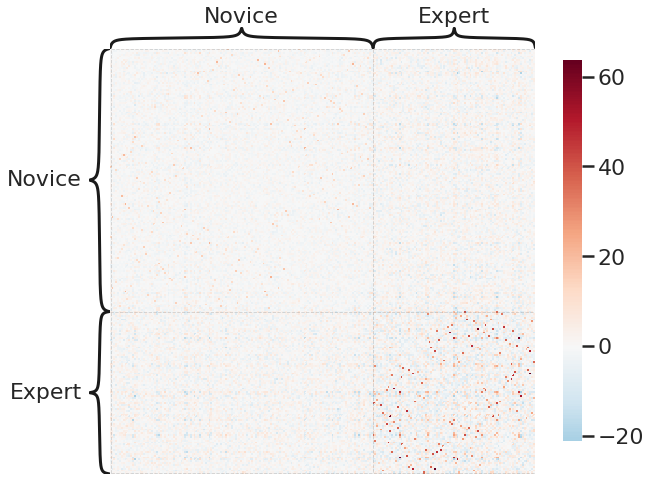

<IPython.core.display.Javascript object>

In [16]:
fig = heatmap(
    c_mat,
    # title=f"Distance Covariance Matrix",
    transform=None,
    inner_hier_labels=y_labels,
    context="poster",
    hier_label_fontsize=22,
)
plt.savefig("../reports/c-matrices/dcorr-experts_vs_novices.pdf")
plt.show()

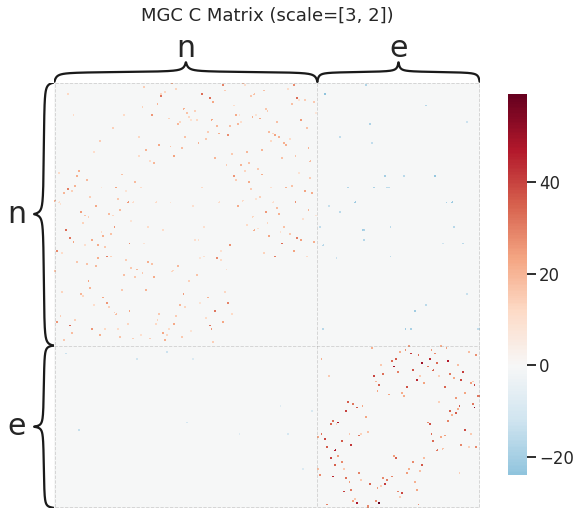

<IPython.core.display.Javascript object>

In [10]:
fig = heatmap(
    mgc_dict["c_mat"],
    title=f'MGC C Matrix (scale={mgc_dict["opt_scale"]})',
    transform=None,
    inner_hier_labels=y_labels,
)
plt.savefig("../reports/c-matrices/mgc-experts_vs_novices.pdf")
plt.show()

## 2-way (states and traits)

In [11]:
ways = [[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2]]
X, Y = k_sample_transform(groups, ways=ways)
X = X[:, :, :3].reshape(X.shape[0], -1)

<IPython.core.display.Javascript object>

In [12]:
X_dists = pairwise_distances(X, metric="euclidean")
Y_dists = pairwise_distances(Y, metric="sqeuclidean") / 2

<IPython.core.display.Javascript object>

DCorr C matrix

In [13]:
dc_stat, dc_pvalue, c_mat = Dcorr(compute_distance=None).test(
    X_dists, Y_dists, workers=-1, reps=1000, c_mat=True
)
print(f"pvalue: {dc_pvalue}")

pvalue: 0.001


<IPython.core.display.Javascript object>

MGC C matrix

In [14]:
stat, pvalue, mgc_dict = multiscale_graphcorr(
    X_dists, Y_dists, workers=-1, reps=1000, compute_distance=None, compute_c_mat=True
)
print(f"pvalue: {pvalue}")
print(f'opt_scale: {mgc_dict["opt_scale"]}')

pvalue: 0.001
opt_scale: [207, 3]


<IPython.core.display.Javascript object>

In [15]:
y = np.repeat(labels, [len(g) for g in groups], axis=0)
label_transform = {
    "compassion": "compasson",
    "restingstate": "resting",
    "openmonitoring": "open",
}
y_labels = [f"{a} {label_transform[b]}" for a, b in y]

<IPython.core.display.Javascript object>

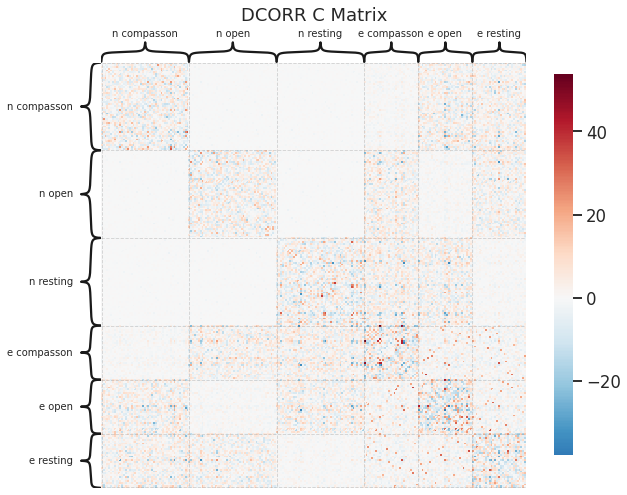

<IPython.core.display.Javascript object>

In [16]:
fig = heatmap(
    c_mat,
    title=f"DCORR C Matrix",
    transform=None,
    inner_hier_labels=y_labels,
    hier_label_fontsize=10,
)
plt.savefig("../reports/c-matrices/dcorr-multiway_states_and_traits.pdf")
plt.show()

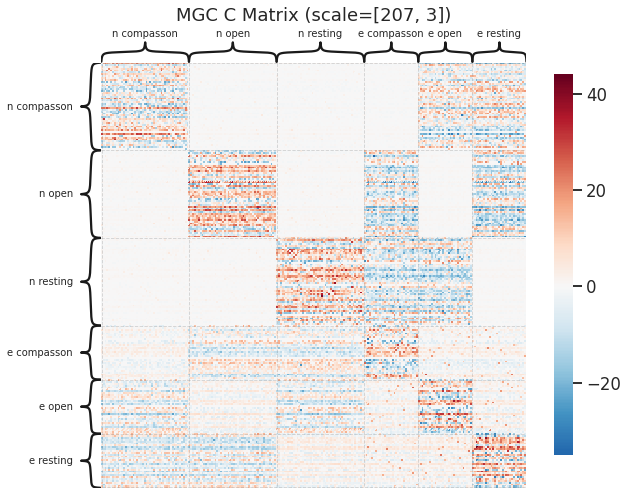

<IPython.core.display.Javascript object>

In [17]:
fig = heatmap(
    mgc_dict["c_mat"],
    title=f'MGC C Matrix (scale={mgc_dict["opt_scale"]})',
    transform=None,
    inner_hier_labels=y_labels,
    hier_label_fontsize=10,
)
plt.savefig("../reports/c-matrices/mgc-multiway_states_and_traits.pdf")
plt.show()

## 6 sample

In [18]:
ways = [[0], [1], [2], [3], [4], [5]]
X, Y = k_sample_transform(groups, ways=ways)
X = X[:, :, :3].reshape(X.shape[0], -1)

<IPython.core.display.Javascript object>

In [19]:
X_dists = pairwise_distances(X, metric="euclidean")
Y_dists = pairwise_distances(Y, metric="sqeuclidean") / 2

<IPython.core.display.Javascript object>

In [20]:
dc_stat, dc_pvalue, c_mat = Dcorr(compute_distance=None).test(
    X_dists, Y_dists, workers=-1, reps=1000, c_mat=True
)
print(f"pvalue: {dc_pvalue}")

pvalue: 0.542


<IPython.core.display.Javascript object>

In [21]:
stat, pvalue, mgc_dict = multiscale_graphcorr(
    X_dists, Y_dists, workers=-1, reps=1000, compute_distance=None, compute_c_mat=True
)
print(f"pvalue: {pvalue}")
print(f'opt_scale: {mgc_dict["opt_scale"]}')

pvalue: 0.51
opt_scale: [228, 2]


<IPython.core.display.Javascript object>

In [22]:
y = np.repeat(labels, [len(g) for g in groups], axis=0)
label_transform = {
    "compassion": "compasson",
    "restingstate": "resting",
    "openmonitoring": "open",
}
y_labels = [f"{a} {label_transform[b]}" for a, b in y]

<IPython.core.display.Javascript object>

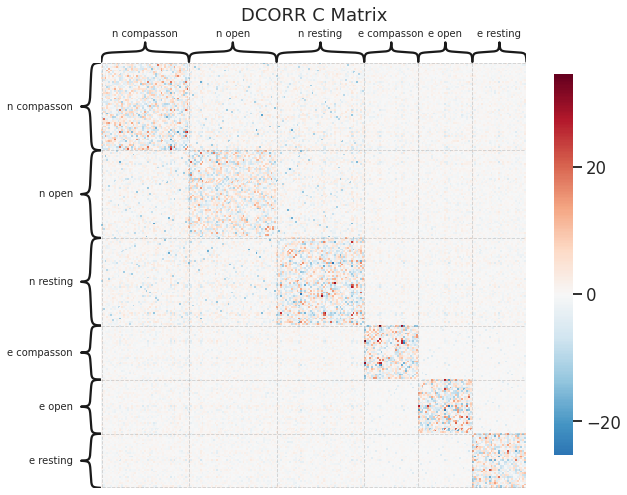

<IPython.core.display.Javascript object>

In [23]:
fig = heatmap(
    c_mat,
    title=f"DCORR C Matrix",
    transform=None,
    inner_hier_labels=y_labels,
    hier_label_fontsize=10,
)
plt.savefig("../reports/c-matrices/dcorr-oneway_states_and_traits.pdf")
plt.show()

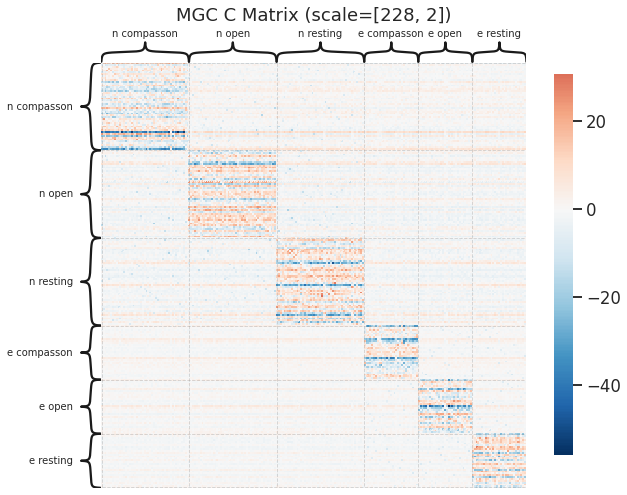

<IPython.core.display.Javascript object>

In [24]:
fig = heatmap(
    mgc_dict["c_mat"],
    title=f'MGC C Matrix (scale={mgc_dict["opt_scale"]})',
    transform=None,
    inner_hier_labels=y_labels,
    hier_label_fontsize=10,
)
plt.savefig("../reports/c-matrices/mgc-oneway_states_and_traits.pdf")
plt.show()

## Validation
modified code to yield the raw distance and rank matrices for validation purposes

In [7]:
stat, pvalue, mgc_dict = multiscale_graphcorr(X_dists, Y_dists, workers=-1, reps=1, compute_distance=None, compute_c_mat=True)

In [84]:
## What MGC runs
distx, disty, rank_distx, rank_disty = mgc_dict['c_mat']
disty = disty.T
rank_disty = rank_disty.T

rank_distx = np.asarray(rank_distx, np.int64) - 1
rank_disty = np.asarray(rank_disty, np.int64) - 1

n = distx.shape[0]
nx = np.max(rank_distx) + 1
ny = np.max(rank_disty) + 1
cov_xy = np.zeros((nx, ny))
expectx = np.zeros(nx)
expecty = np.zeros(ny)

for i in range(n):
    for j in range(n):
        a = distx[i, j]
        b = disty[i, j]
        k = rank_distx[i, j]
        l = rank_disty[i, j]

        cov_xy[k, l] += a * b

        expectx[k] += a
        expecty[l] += b
        
cov_xy[:, 0] = np.cumsum(cov_xy[:, 0])
expectx = np.cumsum(expectx)

cov_xy[0, :] = np.cumsum(cov_xy[0, :])
expecty = np.cumsum(expecty)

for k in range(nx - 1):
    for l in range(ny - 1):
        cov_xy[k+1, l+1] += (cov_xy[k+1, l] + cov_xy[k, l+1] - cov_xy[k, l])

pre centering and normalization (which effectively a scales of all values in the c matrix)

In [115]:
cov_xy

array([[    0.        ,     0.        ],
       [ 5335.51525167,  5204.44531777],
       [ 8733.34007263,  7989.69840998],
       [10181.77030187,  8013.23374279],
       [11657.5863608 ,  8275.26164729],
       [12923.23954448,  8243.56485524],
       [14062.06800981,  8050.30864155],
       [15368.25387401,  8265.47642427],
       [16476.59330922,  8144.88531964],
       [17553.53058189,  8020.30702903],
       [18662.06201647,  8006.07301075],
       [19833.82104496,  8169.02462759],
       [20958.4483887 ,  8283.16000125],
       [22040.11064059,  8357.82174939],
       [23091.9952689 ,  8413.07991137],
       [24140.63848416,  8494.00253035],
       [25056.57280278,  8342.78732673],
       [26100.77643397,  8480.59409601],
       [27025.81441767,  8412.76415772],
       [27896.0590216 ,  8263.36417071],
       [28844.52260015,  8295.05297081],
       [29841.32882757,  8449.09495604],
       [30752.19586591,  8459.13271615],
       [31618.44187772,  8406.18691316],
       [32463.46

In [123]:
distx, disty, rank_distx, rank_disty = mgc_dict['c_mat']

In [125]:
## C matrix calculation for each k,l

c_mats = np.zeros((np.max(rank_distx), np.max(rank_disty)))
for k in range(1,np.max(rank_distx)+1):
    for l in range(1,np.max(rank_disty)+1):
        c_mats[k-1][l-1] = np.sum(distx * disty.T * (rank_distx <= k) * (rank_disty.T<=l))

In [126]:
print(f'max error: {np.max(np.abs(c_mats - cov_xy))}')

max error: 5.820766091346741e-11
